In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import torch
import torch.nn as nn

import transformers
from transformers import BertTokenizer, BertForSequenceClassification

In [44]:
device = torch.device('cuda')

In [45]:
url_df_read = pd.read_csv('url_df.csv', index_col=[0])
url_df_read

,URL_link
0,https://dq06ugkuram52.cloudfront.net/files/637...
1,https://dq06ugkuram52.cloudfront.net/files/635...
2,https://dq06ugkuram52.cloudfront.net/files/637...
3,https://dq06ugkuram52.cloudfront.net/files/635...
4,https://dq06ugkuram52.cloudfront.net/files/635...
...,...
1867,https://dq06ugkuram52.cloudfront.net/files/730...
1868,https://dq06ugkuram52.cloudfront.net/files/730...
1869,https://dq06ugkuram52.cloudfront.net/files/730...
1870,https://dq06ugkuram52.cloudfront.net/files/730...


In [46]:
MSR_df_read = pd.read_csv('MSR_text_2.csv', index_col=[0])
MSR_df_read

,Text
0,10/19/2020\n\nSlavery and Human trafﬁcking | S...
1,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...
2,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...
3,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...
4,Charles Wells Ltd \n \nModern Slavery and Huma...
...,...
1867,\n\n \nModern Slavery Act 2015 Statement \n...
1868,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...
1869,\n\nSlavery and Human Trafficking Transparenc...
1870,Reward Gateway Slavery\nand Human Trafficking\...


In [47]:
df_csv_joined = pd.read_csv('df_csv_joined', index_col=[0])
df_csv_joined

,Answer ID,Answer Page,Metric,Company,Value,Source Page,Text,URL_link
0,6382834,https://wikirate.org/~6382834,Walk Free Foundation+MSA whistleblowing mechan...,S A Brain Company Ltd,"Whistleblower protection (direct employees), W...",https://wikirate.org/~6375302,10/19/2020\n\nSlavery and Human trafﬁcking | S...,https://dq06ugkuram52.cloudfront.net/files/637...
1,6368402,https://wikirate.org/~6368402,Walk Free Foundation+MSA whistleblowing mechan...,Pension Protection Fund,"Whistleblower protection (direct employees), I...",https://wikirate.org/~6355100,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...,https://dq06ugkuram52.cloudfront.net/files/635...
2,6380781,https://wikirate.org/~6380781,Walk Free Foundation+MSA whistleblowing mechan...,Hall & Woodhouse Limited,Whistleblower protection (direct employees),https://wikirate.org/~6375083,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...,https://dq06ugkuram52.cloudfront.net/files/637...
3,6364508,https://wikirate.org/~6364508,Walk Free Foundation+MSA whistleblowing mechan...,Greene King,Whistleblower protection (direct employees),https://wikirate.org/~6357513,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...,https://dq06ugkuram52.cloudfront.net/files/635...
4,6379525,https://wikirate.org/~6379525,Walk Free Foundation+MSA whistleblowing mechan...,Charles Wells,Whistleblower protection (direct employees),https://wikirate.org/~6354153,Charles Wells Ltd \n \nModern Slavery and Huma...,https://dq06ugkuram52.cloudfront.net/files/635...
...,...,...,...,...,...,...,...,...
1713,7311793,https://wikirate.org/~7311793,Walk Free Foundation+MSA whistleblowing mechan...,ECO Animal Health Group Plc,No,https://wikirate.org/~7307585,\n\n \nModern Slavery Act 2015 Statement \n...,https://dq06ugkuram52.cloudfront.net/files/730...
1714,7310878,https://wikirate.org/~7310878,Walk Free Foundation+MSA whistleblowing mechan...,Victoria Plum Limited,No,https://wikirate.org/~7307593,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...,https://dq06ugkuram52.cloudfront.net/files/730...
1715,7310802,https://wikirate.org/~7310802,Walk Free Foundation+MSA whistleblowing mechan...,Creagh Concrete Products Limited,Whistleblower protection (direct employees),https://wikirate.org/~7307608,\n\nSlavery and Human Trafficking Transparenc...,https://dq06ugkuram52.cloudfront.net/files/730...
1716,7311831,https://wikirate.org/~7311831,Walk Free Foundation+MSA whistleblowing mechan...,Reward Gateway (UK) Ltd,"Hotline (direct employees), Whistleblower prot...",https://wikirate.org/~7307616,Reward Gateway Slavery\nand Human Trafficking\...,https://dq06ugkuram52.cloudfront.net/files/730...


In [48]:
# change 'Value' to 1 or 0

from re import search

Value_list = []
for i in range(len(df_csv_joined)):
    if search('(No|no)', df_csv_joined['Value'][i]):
        Value_list.append(0)
    else:
        Value_list.append(1)

Value_df = pd.DataFrame(Value_list, columns= ['Value'])

df_csv_joined['Value'] = Value_df
df_csv_joined

,Answer ID,Answer Page,Metric,Company,Value,Source Page,Text,URL_link
0,6382834,https://wikirate.org/~6382834,Walk Free Foundation+MSA whistleblowing mechan...,S A Brain Company Ltd,1,https://wikirate.org/~6375302,10/19/2020\n\nSlavery and Human trafﬁcking | S...,https://dq06ugkuram52.cloudfront.net/files/637...
1,6368402,https://wikirate.org/~6368402,Walk Free Foundation+MSA whistleblowing mechan...,Pension Protection Fund,1,https://wikirate.org/~6355100,\n\n \n\n \n\n \n\n \n\n \n\n \n\nModern Slav...,https://dq06ugkuram52.cloudfront.net/files/635...
2,6380781,https://wikirate.org/~6380781,Walk Free Foundation+MSA whistleblowing mechan...,Hall & Woodhouse Limited,1,https://wikirate.org/~6375083,10/19/2020\n\nSlavery | Hall and Woodhouse\n\n...,https://dq06ugkuram52.cloudfront.net/files/637...
3,6364508,https://wikirate.org/~6364508,Walk Free Foundation+MSA whistleblowing mechan...,Greene King,1,https://wikirate.org/~6357513,Greene King | MODERN SLAVERY STATEMENT\n\nhttp...,https://dq06ugkuram52.cloudfront.net/files/635...
4,6379525,https://wikirate.org/~6379525,Walk Free Foundation+MSA whistleblowing mechan...,Charles Wells,1,https://wikirate.org/~6354153,Charles Wells Ltd \n \nModern Slavery and Huma...,https://dq06ugkuram52.cloudfront.net/files/635...
...,...,...,...,...,...,...,...,...
1713,7311793,https://wikirate.org/~7311793,Walk Free Foundation+MSA whistleblowing mechan...,ECO Animal Health Group Plc,0,https://wikirate.org/~7307585,\n\n \nModern Slavery Act 2015 Statement \n...,https://dq06ugkuram52.cloudfront.net/files/730...
1714,7310878,https://wikirate.org/~7310878,Walk Free Foundation+MSA whistleblowing mechan...,Victoria Plum Limited,0,https://wikirate.org/~7307593,Upto 60% off + 20% off ends\n\n \n\n \n\nSearc...,https://dq06ugkuram52.cloudfront.net/files/730...
1715,7310802,https://wikirate.org/~7310802,Walk Free Foundation+MSA whistleblowing mechan...,Creagh Concrete Products Limited,1,https://wikirate.org/~7307608,\n\nSlavery and Human Trafficking Transparenc...,https://dq06ugkuram52.cloudfront.net/files/730...
1716,7311831,https://wikirate.org/~7311831,Walk Free Foundation+MSA whistleblowing mechan...,Reward Gateway (UK) Ltd,1,https://wikirate.org/~7307616,Reward Gateway Slavery\nand Human Trafficking\...,https://dq06ugkuram52.cloudfront.net/files/730...


In [49]:
import nltk
import re #regular expression
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()

In [50]:
nltk.download('stopwords')
nltk.download('punkt')

stopwords_eng = stopwords.words('english')
stopwords_eng.append('br')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charissayu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charissayu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
stem_sentence_corpus = torch.load('stem_sentence_corpus')

In [10]:
import torch 
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast
from transformers import BertTokenizer, BertForSequenceClassification

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

sentence_len_list = []
for r in range(len(stem_sentence_corpus)):
    for i in range(len(stem_sentence_corpus[r])):
        inputs = tokenizer(stem_sentence_corpus[r][i], return_tensors="pt")  
        sentence_len_list.append(len(inputs['input_ids'][0]))

Token indices sequence length is longer than the specified maximum sequence length for this model (776 > 512). Running this sequence through the model will result in indexing errors


In [11]:
#find the number of sentences longer than 512

long_sentence_len = []
for i in sentence_len_list:
    if i > 512:
        long_sentence_len.append(i)

len(long_sentence_len)

60

In [12]:
count = 0
doc_num_sentence = []
for i in range(len(stem_sentence_corpus)):
    doc_num_sentence.append(len(stem_sentence_corpus[i]))
    if len(stem_sentence_corpus[i]) >200:
           count +=1

print(count)

35


(0.0, 1000.0)

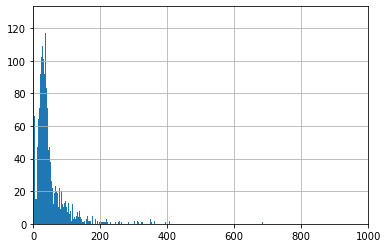

In [13]:
doc_num_sentence_arry = pd.Series(doc_num_sentence)
doc_num_sentence_arry.hist(bins=1000)
plt.xlim(0,1000)

In [14]:
doc_num_sentence_arry.describe()

count    1718.000000
mean       50.417928
std        86.195285
min         1.000000
25%        23.000000
50%        36.000000
75%        53.000000
max      2952.000000
dtype: float64

In [15]:
def file_name(r):
    return 'doc_tensor' + '_' + str(r)

In [16]:
data_tensor = torch.load('data_tensor_fnl')

#### I Tensor

In [17]:
keyword_list = ['hotline', 'suspected incidents', 'reporting line',
            'anonymous reporting', 'workers can call','Whistleblower',
            'report modern slavery cases','focal point','report any suspic',
            'identify and report','appropriate steps to','we encourage',
            'confidential','mechanism for reporting','mechanism to','Whistleblowing',
            'whistleblowers','grievance','whistle','anonymous','protect','24 hours',
            '24/7','retaliation (fear of)','non-retaliation','grievance mechanism','channel',
            'phone line','report concerns','raise concerns','secure line','ethics line', 
            'website','Speak Up','(phone number)']

In [18]:
def contains_word(sentence, keyword_list):
    sent_key_list = []
    for keyword in keyword_list:
        if keyword in sentence:
            sent_key_list.append(1)
        else:
            sent_key_list.append(0)
    if 1 in sent_key_list:
        sent_key = 1
    else: 
        sent_key = 0
    return sent_key 

In [19]:
lambda_list_fnl = []
for i in range(len(stem_sentence_corpus)):
    Lamda_i_list = []
    for r in range(len(stem_sentence_corpus[i])):
        sent_key = contains_word(stem_sentence_corpus[i][r], keyword_list)
        Lamda_i_list.append(sent_key)
    
    max_no_sentence = 200
    pad_len = max_no_sentence - (len(stem_sentence_corpus[i]))
    if pad_len < 0:
        print(i, 'len lambda_i_list', len(Lamda_i_list))
        print('len lamda_i_list_2', len(Lamda_i_list[:200]))
        lambda_list_fnl.append(Lamda_i_list[:200])
    else:
        zero = [0] * pad_len
        print('len zero', len(zero))
        print(i, 'len lambda_i_list', len(Lamda_i_list))
        lamda_i_list_2 = Lamda_i_list + zero
        print('len lamda_i_list_2', len(lamda_i_list_2))
        lambda_list_fnl.append(lamda_i_list_2)

len zero 178
0 len lambda_i_list 22
len lamda_i_list_2 200
len zero 155
1 len lambda_i_list 45
len lamda_i_list_2 200
len zero 166
2 len lambda_i_list 34
len lamda_i_list_2 200
len zero 169
3 len lambda_i_list 31
len lamda_i_list_2 200
len zero 170
4 len lambda_i_list 30
len lamda_i_list_2 200
len zero 155
5 len lambda_i_list 45
len lamda_i_list_2 200
len zero 177
6 len lambda_i_list 23
len lamda_i_list_2 200
len zero 168
7 len lambda_i_list 32
len lamda_i_list_2 200
len zero 175
8 len lambda_i_list 25
len lamda_i_list_2 200
len zero 188
9 len lambda_i_list 12
len lamda_i_list_2 200
len zero 198
10 len lambda_i_list 2
len lamda_i_list_2 200
len zero 106
11 len lambda_i_list 94
len lamda_i_list_2 200
len zero 151
12 len lambda_i_list 49
len lamda_i_list_2 200
len zero 190
13 len lambda_i_list 10
len lamda_i_list_2 200
len zero 119
14 len lambda_i_list 81
len lamda_i_list_2 200
len zero 169
15 len lambda_i_list 31
len lamda_i_list_2 200
len zero 87
16 len lambda_i_list 113
len lamda_i_li

In [20]:
I_tensor = torch.Tensor(lambda_list_fnl)

In [21]:
I_tensor = I_tensor.unsqueeze(1)
I_tensor.shape

torch.Size([1718, 1, 200])

In [22]:
torch.save(I_tensor, 'I_tensor')

In [23]:
I_tensor1 = torch.load('I_tensor')
I_tensor1.shape

torch.Size([1718, 1, 200])

### Model training

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [25]:
label = df_csv_joined['Value'].tolist()

train_x = data_tensor[:1200]
train_y = torch.tensor(label[:1200])
train_i = I_tensor1[:1200]

val_x = data_tensor[1200:1450]
val_y = torch.tensor(label[1200:1450])
val_i = I_tensor1[1200:1450]

test_x = data_tensor[1450:]
test_y = torch.tensor(label[1450:])
test_i = I_tensor1[1450:]

In [26]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

batch_size = 16

train_data = TensorDataset(train_x, train_y, train_i)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_x, val_y, val_i)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [27]:
train_x.shape

torch.Size([1200, 200, 768])

In [28]:
class CNN(nn.Module):

    def __init__(self):
        
        super(CNN, self).__init__()
                        
        self.conv1 = nn.Conv1d(in_channels = 768, out_channels=1, kernel_size=1, stride=1, padding=0)
        
        self.fc = nn.Linear(768,2)
        
        self.softmax = nn.LogSoftmax(dim=1)
        
        #self.dropout = nn.Dropout(0.1)
        
        #self.relu =  nn.ReLU()


    #define the forward pass
    def forward(self, x, y, i):
        
        lbda = 0.25
        
        x = x.permute(0,2,1) #(btch_sz, 200, 768) -> #(btch_sz, 768, 200)(btch_sz, embed_dim, number_sentences)
        
        alpha = self.conv1(x) #(btch_sz, 1, 200)
        
        alpha1 = alpha + lbda * i #(btch_sz, 1, 200) + (btch_sz,1, 200)*(btch_sz, 1, 200) 
        
        alpha_prime = self.softmax(alpha1) #(btch_sz, 1, 200)
        
        alpha_prime_permute = alpha_prime.permute(0,2,1) #(btch_sz, 200, 1) 
        
        h = torch.matmul(x, alpha_prime_permute)  #(btch_sz, 768, 200)*(btch_sz, 200, 1) = (btch_sz, 768, 1)
        
        h = h.view(h.shape[0],-1)
                
        output = self.fc(h)
        
        output = self.softmax(output)
        
        return output

In [29]:
from torch import optim

cnn = CNN()

cross_entropy = nn.NLLLoss()

from transformers import AdamW
optimizer = optim.AdamW(cnn.parameters(), lr = 1e-3)

epochs = 20


In [30]:
#from torch.autograd import Variable

def train():
    cnn.train()
    
    total_loss, total_accuracy = 0, 0
    
    total_preds=[]
    
    for step, batch in enumerate(train_dataloader):
        
        if step % 50 == 0 and not step == 0:
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

        batch = [r.to(device) for r in batch]
 
        x, y, i = batch

        cnn.zero_grad()        

        preds = cnn(x, y, i)

        loss = cross_entropy(preds, y)

        total_loss = total_loss + loss.item()
     
        #loss.backward(retain_graph=True)    # backward pass to calculate the gradients
        loss.backward()

        torch.nn.utils.clip_grad_norm_(cnn.parameters(), 1.0)  # clip the the gradients to 1.0, preventing the exploding gradient problem

        optimizer.step()  # update parameters

        preds=preds.detach().cpu().numpy()   # model predictions are stored on GPU. So, push it to CPU
      
        total_preds.append(preds)   # append the model predictions

    avg_loss = total_loss / len(train_dataloader) # compute the training loss of the epoch
  
    # predictions are in the form of (no. of batches, size of batch, no. of classes).
    # reshape the predictions in form of (number of samples, no. of classes)
    total_preds  = np.concatenate(total_preds, axis=0)

    #returns the loss and predictions
    return avg_loss, total_preds


In [31]:
def evaluate():
    
    print("\nEvaluating...")

    cnn.eval()   # deactivate dropout layers

    total_loss, total_accuracy = 0, 0
  
    total_preds = []  # empty list to save the model predictions

    for step,batch in enumerate(val_dataloader):   # iterate over batches
        
        if step % 50 == 0 and not step == 0:  # Progress update every 50 batches.
            
            #elapsed = format_time(time.time() - t0)
            
            print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(val_dataloader)))

        batch = [t.to(device) for t in batch] # push the batch to gpu

        x, y, i = batch
        
        with torch.no_grad(): # deactivate autograd
            
            preds = cnn(x, y, i)
            
            loss = cross_entropy(preds,y)

            total_loss = total_loss + loss.item()

            preds = preds.detach().cpu().numpy()

            total_preds.append(preds)

    avg_loss = total_loss / len(val_dataloader) 

    total_preds  = np.concatenate(total_preds, axis=0)

    return avg_loss, total_preds

In [32]:
best_valid_loss = float('inf')  # set initial loss to infinite

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

for epoch in range(epochs): #for each epoch
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))

    train_loss, _ = train() #train model
    
    valid_loss, _ = evaluate() #evaluate model
    
    if valid_loss < best_valid_loss: #save the best model
        best_valid_loss = valid_loss
        torch.save(cnn.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.694
Validation Loss: 0.684

 Epoch 2 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.687

 Epoch 3 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.687

 Epoch 4 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.689

 Epoch 5 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.691

 Epoch 6 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.691

 Epoch 7 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.694

 Epoch 8 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.692

 Epoch 9 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation Loss: 0.692

 Epoch 10 / 20
  Batch    50  of     75.

Evaluating...

Training Loss: 0.693
Validation L

In [40]:
len(train_losses)

20

In [42]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

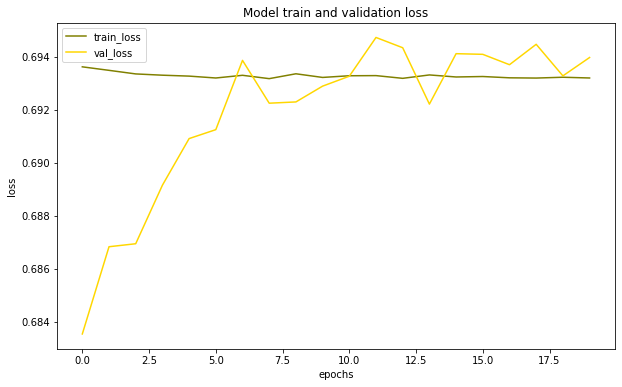

In [41]:
x = list(range(0,20))
plt.figure(figsize=(10,6))
plt.plot(x, train_losses, color='olive')
plt.plot(x, valid_losses, color='gold')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model train and validation loss')
plt.legend(['train_loss', 'val_loss'])

In [34]:
#load weights of best model
path = 'saved_weights.pt'
cnn.load_state_dict(torch.load(path))

<All keys matched successfully>

In [35]:
test_i.shape

torch.Size([268, 1, 200])

In [36]:
# get predictions for test data
with torch.no_grad():
    preds = cnn(test_x, test_y, test_i)
    preds = preds.detach().cpu().numpy()

In [37]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.61      1.00      0.76       163

    accuracy                           0.61       268
   macro avg       0.30      0.50      0.38       268
weighted avg       0.37      0.61      0.46       268



/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/charissayu/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
# confusion matrix
cm = pd.crosstab(test_y, preds)
cm

col_0,1
row_0,
0,105
1,163


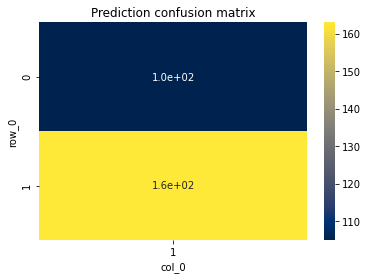

In [39]:
import seaborn as sn
sn.heatmap(cm, annot=True, cmap='cividis')
plt.title('Prediction confusion matrix')
plt.show()